In [5]:
#Libraries to import
#To install nistchempy and jcamp execute "pip install nistchempy jcamp" from terminal
import nistchempy as nist
from jcamp import jcamp_read
import io
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from scipy.signal import find_peaks


#Designate the molecule below.  Search by name
molecule_name = 'acetone'

search = nist.Search(NoIon = True, cMS = True)
search.find_compounds(identifier = molecule_name, search_type = 'name')
search.load_found_compounds()
X = search.compounds[0]

#If successful, the output will print the name of the molecule found in the NIST database
print(search.compounds[0].name)


Acetone


In [7]:
#Gather the available IR spectra from NIST. Slow step.
X.get_spectra('IR')
X.IR

[Spectrum(C67641, IR spectrum #0),
 Spectrum(C67641, IR spectrum #1),
 Spectrum(C67641, IR spectrum #10),
 Spectrum(C67641, IR spectrum #11),
 Spectrum(C67641, IR spectrum #12),
 Spectrum(C67641, IR spectrum #13),
 Spectrum(C67641, IR spectrum #14),
 Spectrum(C67641, IR spectrum #15),
 Spectrum(C67641, IR spectrum #16),
 Spectrum(C67641, IR spectrum #17),
 Spectrum(C67641, IR spectrum #18),
 Spectrum(C67641, IR spectrum #19),
 Spectrum(C67641, IR spectrum #2),
 Spectrum(C67641, IR spectrum #20),
 Spectrum(C67641, IR spectrum #21),
 Spectrum(C67641, IR spectrum #22),
 Spectrum(C67641, IR spectrum #23),
 Spectrum(C67641, IR spectrum #24),
 Spectrum(C67641, IR spectrum #25),
 Spectrum(C67641, IR spectrum #26),
 Spectrum(C67641, IR spectrum #27),
 Spectrum(C67641, IR spectrum #28),
 Spectrum(C67641, IR spectrum #29),
 Spectrum(C67641, IR spectrum #3),
 Spectrum(C67641, IR spectrum #4),
 Spectrum(C67641, IR spectrum #5),
 Spectrum(C67641, IR spectrum #6),
 Spectrum(C67641, IR spectrum #7),


In [8]:
#Gather the parameters the IR spectra were collected under and print them to the output
for i,x in enumerate(X.IR):
    spec = x
    jcamp_dict = jcamp_read(io.StringIO(spec.jdx_text))
    print(i, jcamp_dict['state'])

0 gas
1 GAS (VAPOR)
2 gas
3 gas
4 gas
5 gas
6 gas
7 gas
8 gas
9 gas
10 gas
11 gas
12 GAS (100 mmHg, N2 ADDED, TOTAL PRESSURE 600 mmHg)
13 gas
14 gas
15 gas
16 gas
17 gas
18 gas
19 gas
20 gas
21 gas
22 gas
23 SOLUTION (10% IN CCl4 FOR 4000-1330 CM^-^1, 10% IN CS2 FOR 1330-600 CM^-^1)
24 SOLUTION (10% IN CCl4 FOR 3800-1300, 10% IN CS2 FOR 1300-420 CM^-^1)
25 gas
26 gas
27 gas
28 gas
29 gas


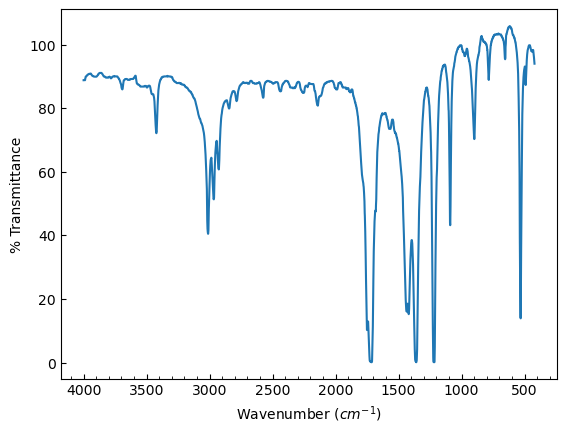

In [86]:

spec=X.IR[i]
jcamp_dict = jcamp_read(io.StringIO(spec.jdx_text))
x = jcamp_dict['x']
y = jcamp_dict['y']
xunits = jcamp_dict['xunits']
yunits = jcamp_dict['yunits']

if(yunits == 'ABSORBANCE'):
    y = 10**-y
    yunits = "% Transmittance"
elif (yunits == 'TRANSMITTANCE'):
    y = y*100
    yunits = "% Transmittance"
if(xunits == '1/CM'):
    xunits = "Wavenumber ($cm^{-1}$)"
peaks, _ = find_peaks(-y, height=None, distance=30)
plt.plot(x, y)


#Sets the fontsize for axis labels
fsize = 10
plt.xlabel(xunits, fontsize=fsize)


plt.ylabel(yunits, fontsize=fsize)
plt.gca().invert_xaxis()
plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.gca().xaxis.set_tick_params(direction = 'in', which='both')
plt.gca().yaxis.set_tick_params(direction = 'in')

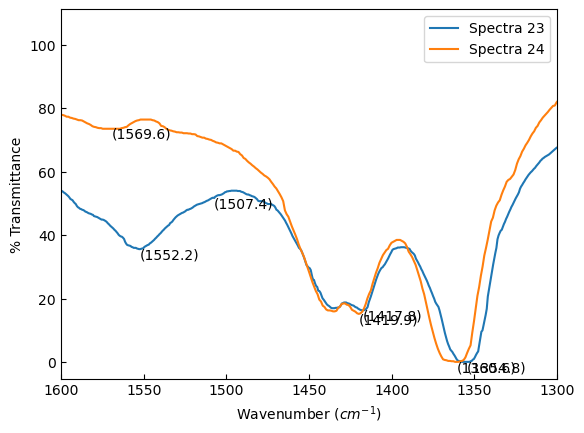

In [90]:
#In a list, put the numbers of the spectra (from above) into this list. 
#All spectra listed here will be put on a single plot
#If you just want one spectra, put a single value into the list
spec_list = [23, 24]

#Set the upper and lower bounds for the IR spectra
lower_bound = 1300
upper_bound = 1600

#Set to True if you want local minima to be displayed on the graph
peak_picker = True

for i in spec_list:
    spec=X.IR[i]
    jcamp_dict = jcamp_read(io.StringIO(spec.jdx_text))
    x = jcamp_dict['x']
    y = jcamp_dict['y']
    xunits = jcamp_dict['xunits']
    yunits = jcamp_dict['yunits']

    if(yunits == 'ABSORBANCE'):
        y = 10**-y
        yunits = "% Transmittance"
    elif (yunits == 'TRANSMITTANCE'):
        y = y*100
        yunits = "% Transmittance"
    if(xunits == '1/CM'):
        xunits = "Wavenumber ($cm^{-1}$)"
    # Note for selecting the peaks, distance describes how far apart peaks must be
    # If you want more peaks that are close together, set distance to a smaller value
    # find_peaks should pick the largest value within that range
    peaks, _ = find_peaks(-y, height=None, distance=30)
    plt.plot(x, y, label=f'Spectra {i}')
    if peak_picker==True:
        for i, j in zip(x[peaks], y[peaks]):
            if i < upper_bound and i > lower_bound:
                k = round(i,1)
                plt.text(k, j-3, '({})'.format(k, j))
    plt.xlim([lower_bound,upper_bound])

#Sets the fontsize for axis labels
fsize = 10
plt.xlabel(xunits, fontsize=fsize)

if len(spec_list)>1:
    plt.legend()


plt.ylabel(yunits, fontsize=fsize)
plt.gca().invert_xaxis()
plt.gca().xaxis.set_minor_locator(MultipleLocator(100))
plt.gca().xaxis.set_tick_params(direction = 'in', which='both')
plt.gca().yaxis.set_tick_params(direction = 'in')